/Users/Fernando/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


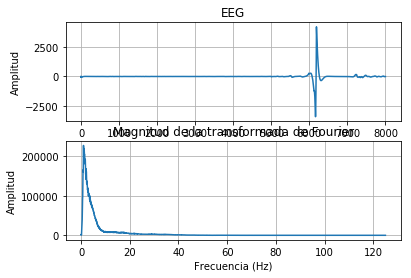

14447.209489458734
13938.881146481057
14134.895106839089
13843.03815093696
13440.898838034029
13199.432998777915
12449.944073650926
12532.335954051146
12580.386088320254
12810.51861827861
13052.497848158899
12826.8253027527
12436.915184694348
11958.652748822984
11702.723872693148
12190.92879528615
12185.387674225556
12108.230581420888
12264.697559923388
11793.401165915562
11530.144581945695
11384.310542707539
11198.07569071476
11744.728216472588
12492.293514765988
12044.191450003513
11630.352868475426
10947.0415997034
10305.40530250134
10649.36288527747
11011.707689680139
11307.4275548071
11032.083185282709
11031.141411343633
10417.961949019096
10177.706851357463
10107.94536765523
9834.121403701822
9973.708087738085
9802.086141127984
9889.0816657254
9574.773862472317
9073.684749572973
8520.48577379366
9411.386825857302
8748.138806017627
9111.414655648518
9357.392547697342
9673.35831587931
9627.9728072305
9054.877439114725
8588.56235234892
8200.520714317165
8833.953417824325
9030.201275

In [ ]:
import tkinter
import tkinter as tk
import tkinter.ttk as ttk
import argparse  # new in Python2.7
import atexit
import logging
import string
import sys
import threading
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import numpy as np
from scipy import signal
import serial 
import queue
import threading
from yapsy.PluginManager import PluginManager
from tkinter import Canvas
from guiLoop import guiLoop



from ttkthemes import themed_tk as ttk

root = ttk.ThemedTk()
root.title("OpenBCI")
def process():    
    while 1:
        df = pd.read_csv('/Applications/SavedData/OpenBCI-RAW-2019-04-29_09-57-10.txt',delim_whitespace=True, names=('Tiempo', '1', '2','3','4','5','6','7','8'))
        #df2 = pd.read_csv(filelist[-1], delimiter = ',',names=['Tiempo', '1', '2','3','4','5','6','7','8','9'])
        dt = df.loc[: , "7"]
        dt1=dt.tail(8000) #2 seg
        
        data = dt1.str.replace(",","")
        data = pd.to_numeric(data,downcast='signed')
        np.nan_to_num(data,[])

        fs= 250
        t = np.arange(1,len(data)+1,1)

        tsample = 1/fs
        # In[] Filtros
        f_low = 50                        
        f_high = 1                      
        # Filtro pasa bajas de 50 hz
        b, a = signal.butter(2, 2*f_low/fs, btype='low')
        filt= signal.filtfilt(b, a, data)
        #Filtro pasa altas de 1 hz
        b1, a1 = signal.butter(2, 2*f_high/fs, btype='high') 
        filt1= signal.filtfilt(b1, a1, filt)
        #Filtro Notch
        fstart=(58)/fs*2;# Cutoff frequencies
        fstop=(62)/fs*2;# Cutoff frequencies
        b2, a2 = signal.butter(2,[fstart,fstop],'bandstop'); # Calculate filter coefficients
        filt2= signal.filtfilt(b2, a2, filt1)
        filt2=filt2/24

        # In[] Transformada de Fourier
        ft = np.abs(np.fft.fft(filt2)) #Magnitud 
        ft = ft[0:int(len(ft)/2)] 
        f = np.linspace(0,fs/2,len(ft))# Vector de frecuencias 
        #f= [8,2,9,10,9,11,12]
        #ft=[18,18,12,23,40,50,16]
        plt.figure()
        ax1 = plt.subplot(2,1,1)
        plt.plot(t,filt2)
        plt.title('EEG'),plt.xlabel('Tiempo (s)'),plt.ylabel('Amplitud')
        plt.grid()
        ax1 = plt.subplot(2,1,2)
        plt.plot(f,ft)
        plt.title('Magnitud de la transformada de Fourier'),plt.xlabel('Frecuencia (Hz)'),plt.ylabel('Amplitud')
        plt.grid()
        plt.show()
        for i in range(len(f)): 
            #f1= f[i,]
            f1= f[i]
            if f1 >= 8 and f1<= 14:
                #amp=ft[i,]
                amp=ft[i]
                print (amp)
                if amp >= 15 and amp <=30:
                    label2 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
                    label2.pack( fill="x", pady=50)
                    label2.place(x=124,y=172,width=100,height=85)
                    
                    label3 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
                    label3.pack( fill="x", pady=50)
                    label3.place(x=124,y=258,width=100,height=85)
                    
                    label4 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
                    label4.pack( fill="x", pady=50)
                    label4.place(x=124,y=344,width=100,height=85)
                    
                    label5 = tk.Label(text="_____", fg="#b2ebf2", bg="#b2ebf2")
                    label5.pack( fill="x", pady=50)
                    label5.place(x=124,y=430,width=100,height=85)
                    

                elif amp >=31 and amp <=40:
                    label2 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
                    label2.pack( fill="x", pady=50)
                    label2.place(x=124,y=172,width=100,height=85)
                    label3 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
                    label3.pack( fill="x", pady=50)
                    label3.place(x=124,y=258,width=100,height=85)
                    label4 = tk.Label(text="_____", fg="#b2ebf2", bg="#b2ebf2")
                    label4.pack( fill="x", pady=50)
                    label4.place(x=124,y=344,width=100,height=85)
                    label5 = tk.Label(text="_____", fg="#b2ebf2", bg="#b2ebf2")
                    label5.pack( fill="x", pady=50)
                    label5.place(x=124,y=430,width=100,height=85)

                elif amp >=41 and amp <=50:
                    label2 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
                    label2.pack( fill="x", pady=50)
                    label2.place(x=124,y=172,width=100,height=85)
                    label3 = tk.Label(text="_____", fg="#b2ebf2", bg="#b2ebf2")
                    label3.pack( fill="x", pady=50)
                    label3.place(x=124,y=258,width=100,height=85)
                    label4 = tk.Label(text="_____", fg="#b2ebf2", bg="#b2ebf2")
                    label4.pack( fill="x", pady=50)
                    label4.place(x=124,y=344,width=100,height=85)
                    label5 = tk.Label(text="_____", fg="#b2ebf2", bg="#b2ebf2")
                    label5.pack( fill="x", pady=50)
                    label5.place(x=124,y=430,width=100,height=85)

                elif amp >=51 and amp <=60:
                    label2 = tk.Label(text="_____", fg="#b2ebf2", bg="#b2ebf2")
                    label2.pack( fill="x", pady=50)
                    label2.place(x=124,y=172,width=100,height=85)
                    label3 = tk.Label(text="_____", fg="#b2ebf2", bg="#b2ebf2")
                    label3.pack( fill="x", pady=50)
                    label3.place(x=124,y=258,width=100,height=85)
                    label4 = tk.Label(text="_____", fg="#b2ebf2", bg="#b2ebf2")
                    label4.pack( fill="x", pady=50)
                    label4.place(x=124,y=344,width=100,height=85)
                    label5 = tk.Label(text="_____", fg="#b2ebf2", bg="#b2ebf2")
                    label5.pack( fill="x", pady=50)
                    label5.place(x=124,y=430,width=100,height=85)

                else: 
                    label2 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
                    label2.pack( fill="x", pady=50)
                    label2.place(x=124,y=172,width=100,height=85)
                    label3 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
                    label3.pack( fill="x", pady=50)
                    label3.place(x=124,y=258,width=100,height=85)
                    label4 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
                    label4.pack( fill="x", pady=50)
                    label4.place(x=124,y=344,width=100,height=85)
                    label5 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
                    label5.pack( fill="x", pady=50)
                    label5.place(x=124,y=430,width=100,height=85)
                    
canvas = Canvas(bg="#1959B3",height=550, width=340)
canvas.pack()           
canvas.place(x=3,y=3)

label = tk.Label(text="OpenBCI", font=("Times",50),fg="white", bg="#1959B3")
label.pack(side="top", fill="x", pady=10)
label.place(relx=0.2,rely=0.07)
label2 = tk.Label(text="Camila Andrea Navarrete Cataño", fg="white", bg="#1959B3", font=("Verdana")) 
label2.pack(side="bottom", fill="x", pady=10)
label3 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
label3.pack( fill="x", pady=50)
label3.place(x=124,y=172,width=100,height=85)
label4 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
label4.pack( fill="x", pady=50)
label4.place(x=124,y=258,width=100,height=85)
label5 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
label5.pack( fill="x", pady=50)
label5.place(x=124,y=344,width=100,height=85)
label6 = tk.Label(text="_____", fg="#1959B3", bg="#1959B3")
label6.pack( fill="x", pady=50)
label6.place(x=124,y=430,width=100,height=85)
t1=threading.Thread(target=process)
t1.start()




root.geometry("350x600+440+20")
root.mainloop()



In [ ]:
#def process(self):    
#    while 1:
#        df = pd.read_csv('/Applications/SavedData/OpenBCI-RAW-2019-04-20_18-42-47.txt',delim_whitespace=True, names=('Tiempo', '1', '2','3','4','5','6','7','8'))
#        #df2 = pd.read_csv(filelist[-1], delimiter = ',',names=['Tiempo', '1', '2','3','4','5','6','7','8','9'])
#        dt = df.loc[: , "7"]
#        dt1=dt.tail(500) #2 seg
#        data = dt1.str.replace(",","")
#        data = pd.to_numeric(data,downcast='signed')
#        np.nan_to_num(data,[])
#
#        fs= 250
#        t = np.arange(1,len(data)+1,1)
#
#        tsample = 1/fs
        # In[] Filtros
#        f_low = 50                        
#        f_high = 1                      
        # Filtro pasa bajas de 50 hz
#        b, a = signal.butter(2, 2*f_low/fs, btype='low')
#        filt= signal.filtfilt(b, a, data)
#        #Filtro pasa altas de 1 hz
#        b1, a1 = signal.butter(2, 2*f_high/fs, btype='high') 
#        filt1= signal.filtfilt(b1, a1, filt)
#        #Filtro Notch
#        fstart=(58)/fs*2;# Cutoff frequencies
#        fstop=(62)/fs*2;# Cutoff frequencies
#        b2, a2 = signal.butter(2,[fstart,fstop],'bandstop'); # Calculate filter coefficients
#        filt2= signal.filtfilt(b2, a2, filt1)
#        filt2=filt2/24

        # In[] Transformada de Fourier
#        ft = np.abs(np.fft.fft(filt2)) #Magnitud 
#        ft = ft[0:int(len(ft)/2)] 
#        f = np.linspace(0,fs/2,len(ft))# Vector de frecuencias 
        #f= [8,2,9,10,9,11,12]
        #ft=[18,18,12,23,40,50,16]
#        for i in range(len(f)): 
#            #f1= f[i,]
#            f1= f[i]
#            if f1 >= 8 and f1<= 14:
#                #amp=ft[i,]
#                amp=ft[i]
#                print (amp)
#                if amp >= 15 and amp <=30:
#                    label2 = tk.Label(self,text="_____", fg="#1959B3", bg="#1959B3")
#                    label2.pack( fill="x", pady=50)
#                    label2.place(x=124,y=172,width=100,height=85)
#                    label3 = tk.Label(self,text="_____", fg="#1959B3", bg="#1959B3")
#                    label3.pack( fill="x", pady=50)
#                    label3.place(x=124,y=258,width=100,height=85)
#                    label4 = tk.Label(self,text="_____", fg="#1959B3", bg="#1959B3")
#                    label4.pack( fill="x", pady=50)
#                    label4.place(x=124,y=344,width=100,height=85)
#                    label5 = tk.Label(self,text="_____", fg="#b2ebf2", bg="#b2ebf2")
#                    label5.pack( fill="x", pady=50)
#                    label5.place(x=124,y=430,width=100,height=85)

#                elif amp >=31 and amp <=40:
#                    label2 = tk.Label(self,text="_____", fg="#1959B3", bg="#1959B3")
#                    label2.pack( fill="x", pady=50)
#                    label2.place(x=124,y=172,width=100,height=85)
#                    label3 = tk.Label(self,text="_____", fg="#1959B3", bg="#1959B3")
#                    label3.pack( fill="x", pady=50)
#                    label3.place(x=124,y=258,width=100,height=85)
#                    label4 = tk.Label(self,text="_____", fg="#b2ebf2", bg="#b2ebf2")
#                    label4.pack( fill="x", pady=50)
#                    label4.place(x=124,y=344,width=100,height=85)
#                    label5 = tk.Label(self,text="_____", fg="#b2ebf2", bg="#b2ebf2")
#                    label5.pack( fill="x", pady=50)
#                    label5.place(x=124,y=430,width=100,height=85)
#
#                elif amp >=41 and amp <=50:
#                    label2 = tk.Label(self,text="_____", fg="#1959B3", bg="#1959B3")
#                    label2.pack( fill="x", pady=50)
#                    label2.place(x=124,y=172,width=100,height=85)
#                    label3 = tk.Label(self,text="_____", fg="#b2ebf2", bg="#b2ebf2")
#                    label3.pack( fill="x", pady=50)
#                    label3.place(x=124,y=258,width=100,height=85)
#                    label4 = tk.Label(self,text="_____", fg="#b2ebf2", bg="#b2ebf2")
#                    label4.pack( fill="x", pady=50)
#                    label4.place(x=124,y=344,width=100,height=85)
#                    label5 = tk.Label(self,text="_____", fg="#b2ebf2", bg="#b2ebf2")
#                    label5.pack( fill="x", pady=50)
#                    label5.place(x=124,y=430,width=100,height=85)

#                elif amp >=51 and amp <=60:
#                    label2 = tk.Label(self,text="_____", fg="#b2ebf2", bg="#b2ebf2")
#                    label2.pack( fill="x", pady=50)
#                    label2.place(x=124,y=172,width=100,height=85)
#                    label3 = tk.Label(self,text="_____", fg="#b2ebf2", bg="#b2ebf2")
#                    label3.pack( fill="x", pady=50)
#                    label3.place(x=124,y=258,width=100,height=85)
#                    label4 = tk.Label(self,text="_____", fg="#b2ebf2", bg="#b2ebf2")
#                    label4.pack( fill="x", pady=50)
#                    label4.place(x=124,y=344,width=100,height=85)
#                    label5 = tk.Label(self,text="_____", fg="#b2ebf2", bg="#b2ebf2")
#                    label5.pack( fill="x", pady=50)
#                    label5.place(x=124,y=430,width=100,height=85)

#                else: 
#                    label2 = tk.Label(self,text="_____", fg="#1959B3", bg="#1959B3")
#                    label2.pack( fill="x", pady=50)
#                    label2.place(x=124,y=172,width=100,height=85)
#                    label3 = tk.Label(self,text="_____", fg="#1959B3", bg="#1959B3")
#                    label3.pack( fill="x", pady=50)
#                    label3.place(x=124,y=258,width=100,height=85)
#                    label4 = tk.Label(self,text="_____", fg="#1959B3", bg="#1959B3")
#                    label4.pack( fill="x", pady=50)
#                    label4.place(x=124,y=344,width=100,height=85)
#                    label5 = tk.Label(self,text="_____", fg="#1959B3", bg="#1959B3")
#                    label5.pack( fill="x", pady=50)
#                    label5.place(x=124,y=430,width=100,height=85)
                    
#class SampleApp(tk.Tk):
                            
#        def __init__(self, *args, **kwargs):
#            tk.Tk.__init__(self, *args, **kwargs)
#            self.title("OpenBCI")
#            canvas = Canvas(self,bg="#1959B3",height=550, width=340)
#            canvas.pack()
            
#            canvas.place(x=3,y=3)

#            label = tk.Label(self, text="OpenBCI", font=("Times",50),fg="white", bg="#1959B3")
#            label.pack(side="top", fill="x", pady=10)
#            label.place(relx=0.2,rely=0.07)
#            label2 = tk.Label(self, text="Camila Andrea Navarrete Cataño", fg="white", bg="#1959B3", font=("Verdana")) 
#            label2.pack(side="bottom", fill="x", pady=10)
#            t1=threading.Thread(target=process)
#            t1.start()
            
            #logging.basicConfig(level=logging.ERROR)
            # Load the plugins from the plugin directory.
            #manager = PluginManager()
            #%run user.py -p /dev/tty.usbserial-DM00Q8QL --add csv_collect record.csv
            #time.sleep(6)
            #filelist=os.listdir('./')
            #for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
             #   if not(fichier.endswith(".csv")):
             #       filelist.remove(fichier)
            #filelist.sort(key=lambda x: os.path.getmtime(x))


            #ps= serial.Serial('/dev/cu.usbmodem14201',9600)
                #cont=0
                #time.sleep(0.5)
               # filelist=os.listdir('./')
                #for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
                 #   if not(fichier.endswith(".csv")):
                  #      filelist.remove(fichier)
               # print(filelist)
                #filelist.sort(key=lambda x: os.path.getmtime(x))
                #filelist[-1]
        
        
                        

#app = SampleApp()
#app.geometry("350x600+440+20")
#app.mainloop()

In [ ]:
filelist=os.listdir('/Applications/SavedData')
for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
    if not(fichier.endswith(".txt")):
        filelist.remove(fichier)
print(filelist)

In [ ]:
filelist.sort(key=lambda x: os.path.getmtime(x))

